25.0 254.0


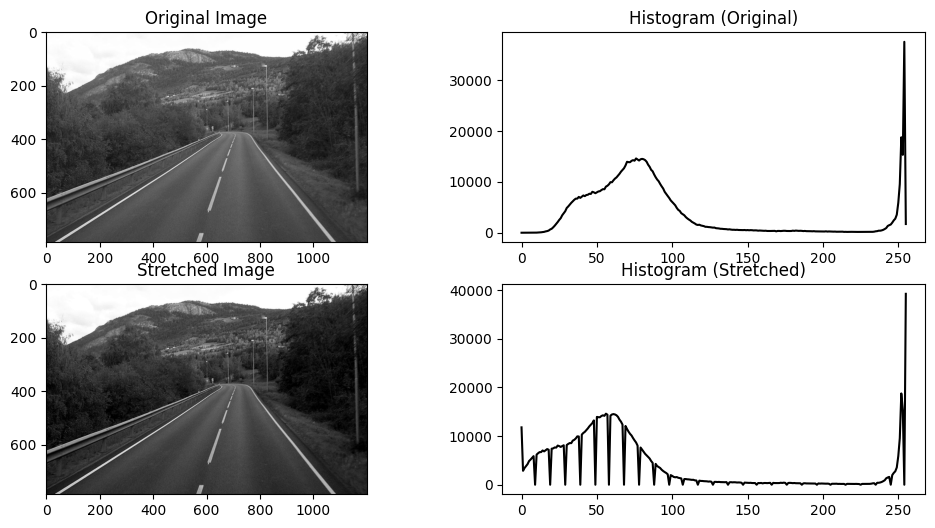

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def apply_contrast_stretching(image, low, high):
    # Ensure the low and high values are within the valid range [0, 255]


    # Create a copy of the image to avoid modifying the original
    stretched_image = image.copy()

    # Apply the contrast stretching to each pixel
    stretched_image = np.where(stretched_image < low, 0, stretched_image)
    stretched_image = np.where((low <= stretched_image) & (stretched_image <= high),
                              (255 / (high - low)) * (stretched_image - low), stretched_image)
    stretched_image = np.where(stretched_image > high, 255, stretched_image)

    return stretched_image
image = cv2.imread('/content/1200px-Road_in_Norway.jpg')
# Check if the image was loaded successfully
image = np.uint8(image)

    # Convert the loaded image to grayscale if it's in color (optional)
if len(image.shape) == 3 and image.shape[2] == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Define the low and high values for contrast stretching
low_value = np.percentile(image, 1)  # 1st percentile
high_value = np.percentile(image, 99)  # 99th percentile
print(low_value,high_value)
# Apply contrast stretching to the image using the provided function
stretched_image = apply_contrast_stretching(image, low_value, high_value)
import matplotlib.pyplot as plt
stretched_image = np.uint8(stretched_image)
image = np.uint8(image)
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_stretched = cv2.calcHist([stretched_image], [0], None, [256], [0, 256])

# Display the original and stretched images side by side with their histograms
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

# Original Image and Histogram
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.plot(hist_original, color='black')
plt.title('Histogram (Original)')
# Stretched Image and Histogram
plt.subplot(2, 2, 3)
plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Image')
plt.subplot(2, 2, 4)
plt.plot(hist_stretched, color='black')
plt.title('Histogram (Stretched)')

plt.show()


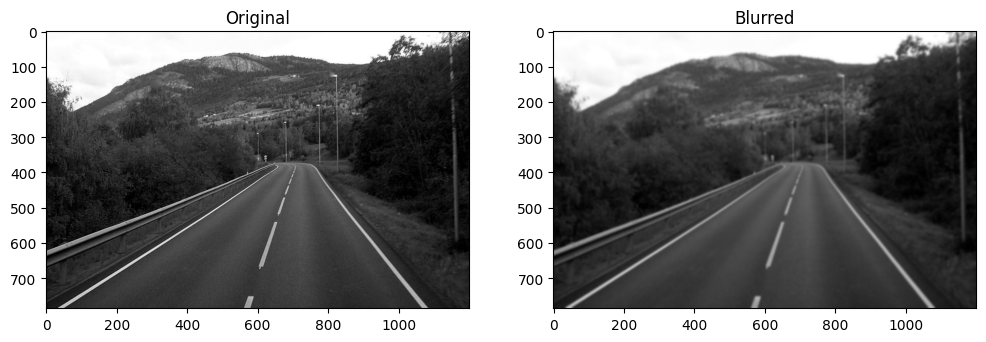

In [11]:
import cv2


# Load the image

# Apply Gaussian blur
kernel_size = (15, 15)  # You can adjust the kernel size as needed
blurred_image = cv2.GaussianBlur(stretched_image, kernel_size, 0)
plt.figure(figsize=(12, 6))
# Display the original and blurred images
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(stretched_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)), plt.title('Blurred')
plt.show()


<ipython-input-13-9679035b6470>:12: RuntimeWarning: overflow encountered in ubyte_scalars
  LBP_value = sum(calculate_L(neighbor - center_pixel, i_T) for neighbor in neighbors)


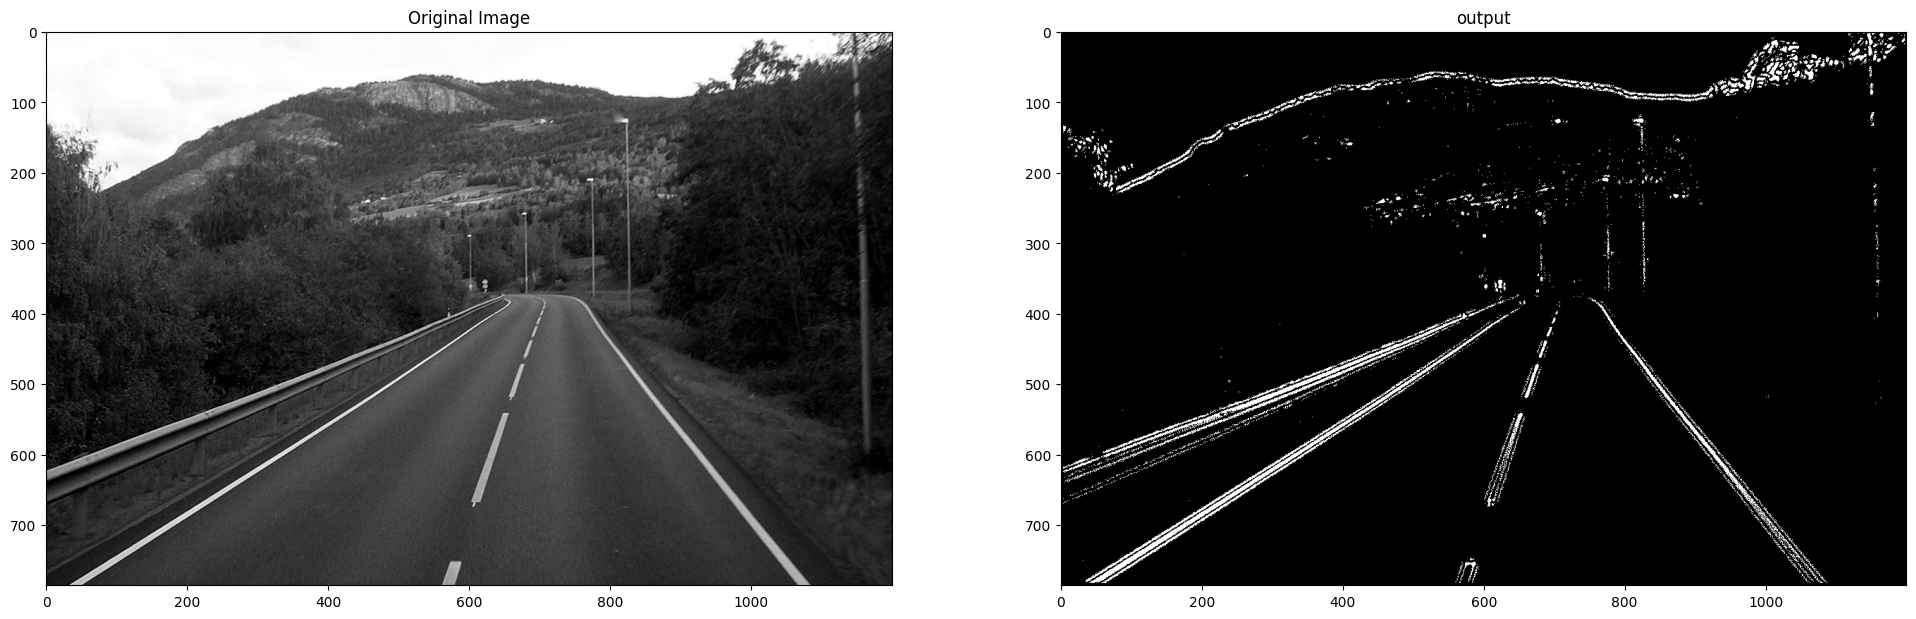

In [13]:

import numpy as np

def calculate_L(j, i_T):
    return 1 if j >= i_T else 0
def calculate_D(k):
    return 1 if k >= 1 else 0
def calculate_DLBP(center_pixel, neighbors):
    i_max = np.max(neighbors)
    i_aver = np.mean(neighbors)
    i_T = i_max - i_aver
    LBP_value = sum(calculate_L(neighbor - center_pixel, i_T) for neighbor in neighbors)
    DLBP_value = calculate_D(LBP_value)
    return DLBP_value

def calculate_R(center_pixel, neighbors, threshold=1.5):
    i_aver = np.mean(neighbors)
    return calculate_DLBP(center_pixel, neighbors) if abs(center_pixel - i_aver) >= threshold else 0

# Load a grayscale image
image = blurred_image.copy()

# Create an output image to store the R values
output_image = np.zeros_like(image)

# Define the neighborhood size (3x3)
neighborhood_size = 3

# Iterate through the image pixels, applying DLBP and edge detection
for y in range(neighborhood_size, image.shape[0] - neighborhood_size):
    for x in range(neighborhood_size, image.shape[1] - neighborhood_size):
        center_pixel = image[y, x]
        neighbors = [image[y-1, x-1], image[y-1, x], image[y-1, x+1],
                     image[y, x-1], image[y, x+1],
                     image[y+1, x-1], image[y+1, x], image[y+1, x+1]]

        R_value = calculate_R(center_pixel, neighbors)
        output_image[y, x] = R_value

# Save or display the resulting edge map (output_image)
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plt.imshow(stretched_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('output')
# Stretched Image and Histogram

plt.show()


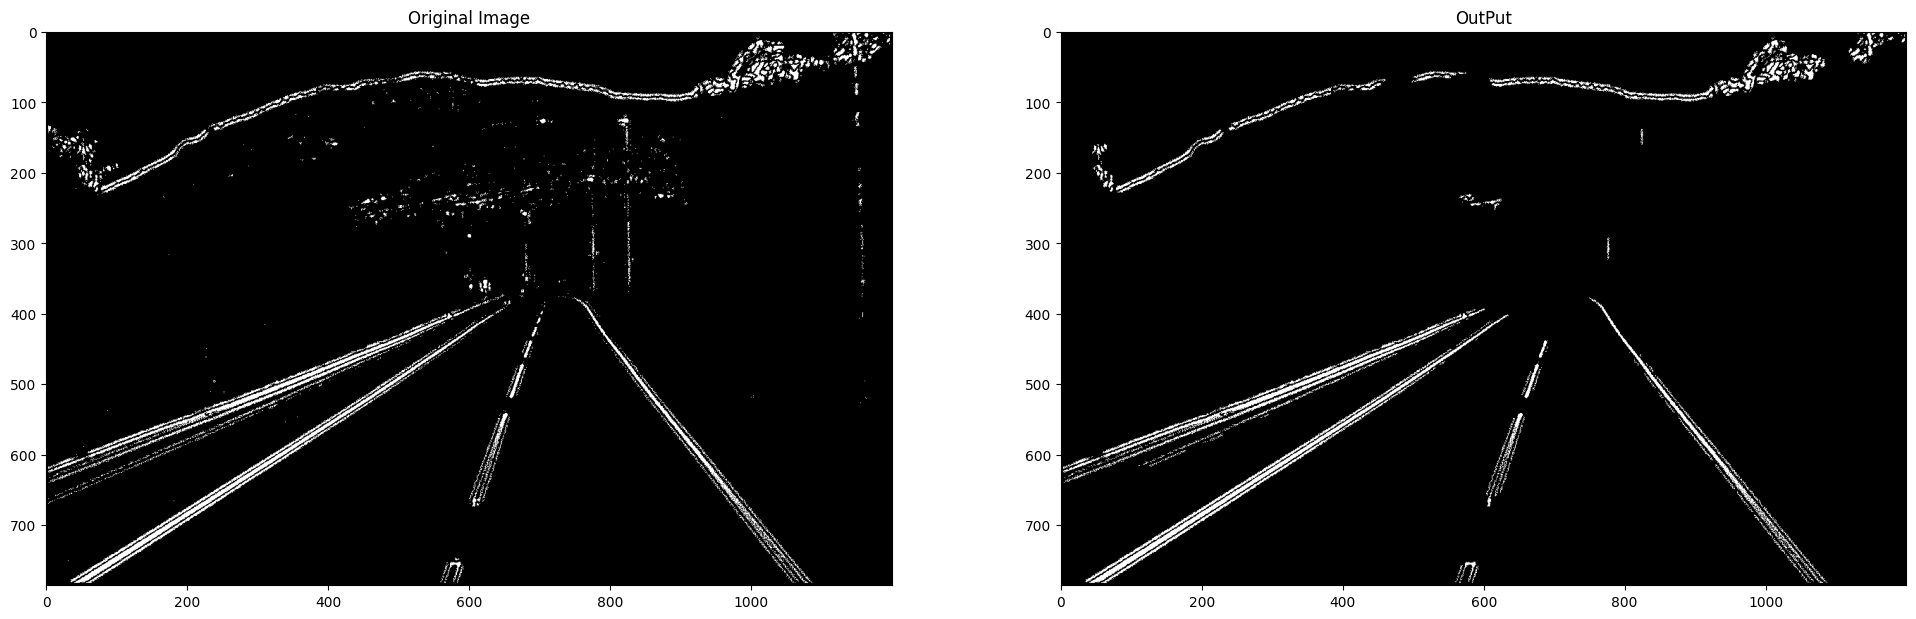

In [14]:
import cv2
import numpy as np

def remove_isolated_edges(depth_edge_map, mask_size):
    h, w = depth_edge_map.shape
    half_mask = mask_size // 2

    # Create a mask for filtering
    mask = np.ones((mask_size, mask_size), dtype=np.uint8)

    # Iterate through the image, excluding the border
    for y in range(half_mask, h - half_mask):
        for x in range(half_mask, w - half_mask):
            # Extract the neighborhood of the current pixel
            neighborhood = depth_edge_map[y - half_mask:y + half_mask + 1, x - half_mask:x + half_mask + 1]
            # Check if any pixel in the neighborhood exceeds the threshold
            if (np.all(neighborhood[0, :] != 1) and np.all(neighborhood[-1, :] != 1) and np.all(neighborhood[:, 0] != 1) and np.all(neighborhood[:, -1] != 1)):
              # Set all elements to 0
              depth_edge_map[y - half_mask:y + half_mask + 1, x - half_mask:x + half_mask + 1] = np.zeros_like(neighborhood)
            elif (np.all(neighborhood[1, :] != 1) and np.all(neighborhood[-2, :] != 1) and np.all(neighborhood[:, 1] != 1) and np.all(neighborhood[:, -2] != 1)) :
              depth_edge_map[y,x]=0
    return depth_edge_map

# Load the depth edge map (replace 'your_depth_edge_map.png' with the actual path)
depth_edge_map = output_image.copy()

# Remove isolated edges using a 5x5 mask and a threshold of 128
result = remove_isolated_edges(depth_edge_map, mask_size=20)
plt.figure(figsize=(24, 12))
# Save or display the resulting depth edge map
plt.subplot(1, 2, 1)
plt.imshow(output_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(depth_edge_map, cmap='gray')
plt.title('OutPut')
# Stretched Image and Histogram

plt.show()

